### Import Libraries 

In [2]:
import pickle
import warnings
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sb
sb.set_style(style='whitegrid')
%matplotlib inline 
warnings.filterwarnings('ignore')

### Exploratory Data Analysis & VISUALIZATIONS 

Exploratory Data Analysis  is a crrucial phase in every data science project. In this stage, we will apply statistical methods and use visualizations to extract trends within data and draw some insights about the correlations between each of the featutures [independant variables] and the target [ dependent variable]. 

#### Target vs  Predictor Variables  

In [6]:
# Load preprocessed data
df = pd.read_csv('../data/preprocessed_used_cars.csv')
df.head()

,price,production_year,mileage,fuel_type,mark,model,fiscal_power
0,135000,2013.0,169999,Diesel,Peugeot,508,6
1,53000,2008.0,39999,Diesel,Renault,Clio,6
2,59000,2007.0,189999,Diesel,Citroen,C3,6
3,88000,2010.0,39999,Diesel,Mercedes-Benz,220,6
4,60000,2009.0,139999,Essence,Ford,Fiesta,7


##### Price vs Fuel Type

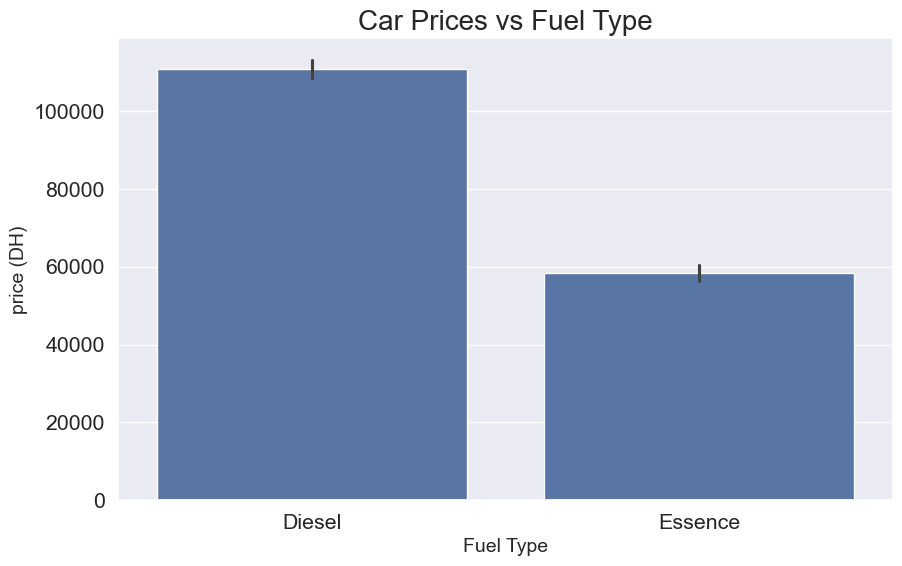

In [12]:
plt.style.use('ggplot')
sb.set(font_scale=1.4)
fig = plt.figure(figsize=(10, 6))
sb.barplot(x='fuel_type',y='price',data=df,dodge=True)
plt.xlabel("Fuel Type", fontsize=14)
plt.ylabel("price (DH)", fontsize=14)
plt.title('Car Prices vs Fuel Type',fontsize=20)
fig.savefig('pricefueltype.jpg',dpi=500)

##### Mark vs Price

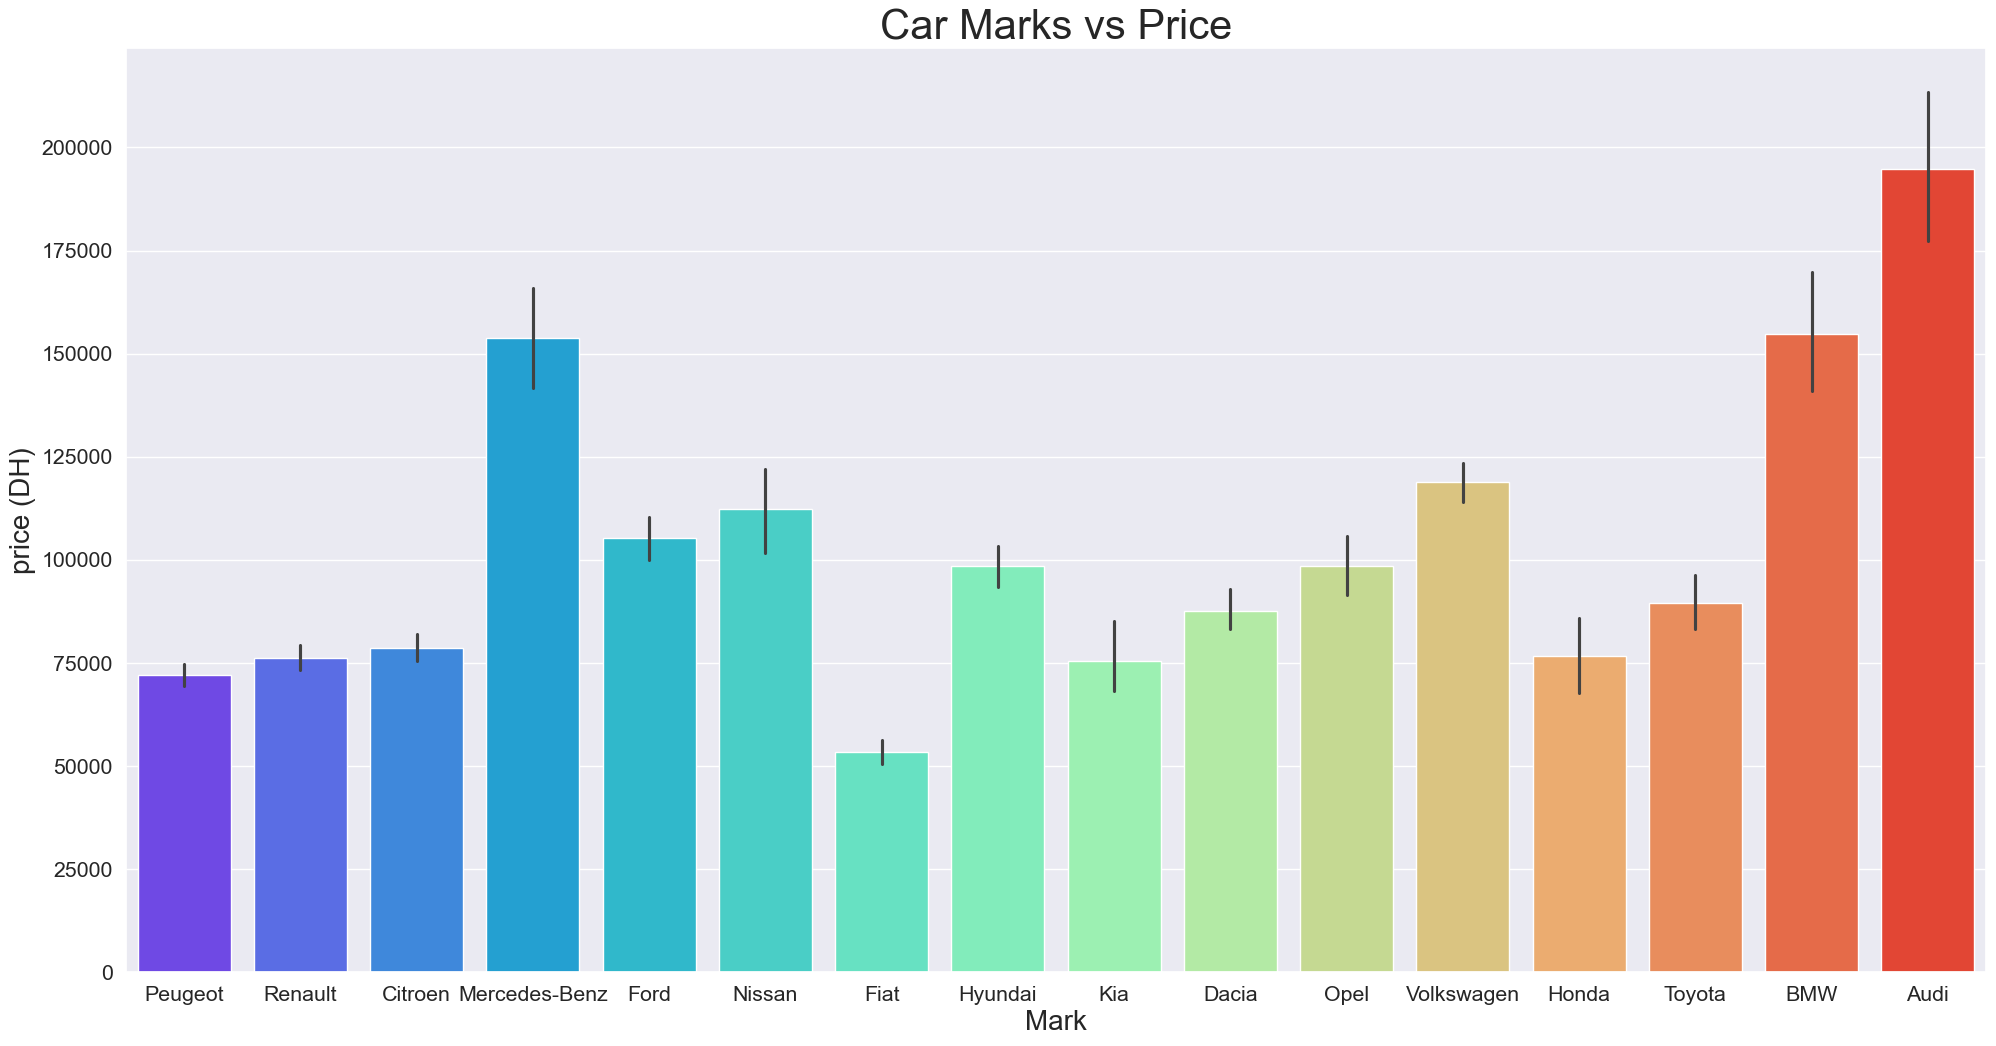

In [17]:
plt.style.use('bmh')
plt.style.use('ggplot')
sb.set(font_scale=1.4)
fig = plt.figure(figsize=(24, 12))
sb.barplot(x='mark',y='price',data=df_top_marks,palette='rainbow')
plt.title('Car Marks vs Price',fontsize=30)
plt.xlabel("Mark", fontsize=20)
plt.ylabel("price (DH)", fontsize=20)
fig.savefig('pricemark.jpg',dpi=500)

##### Numerical Features vs Price

<Figure size 1152x720 with 0 Axes>

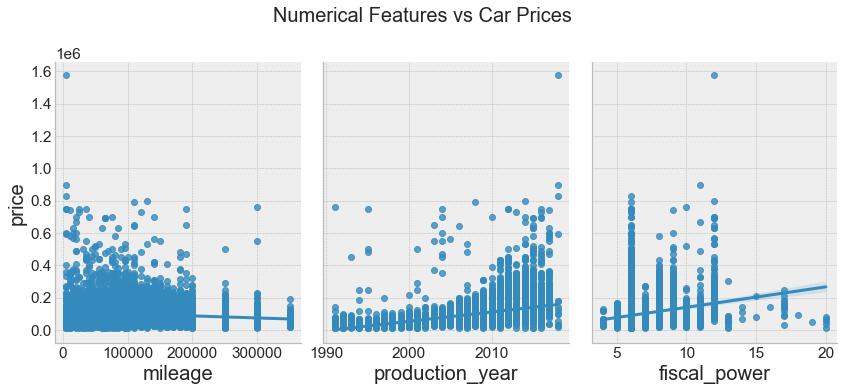

In [66]:
#plot the pairplot 
plt.style.use('bmh')
fig = plt.figure(figsize=(16, 10))
#sb.set(font_scale= 1.4)
# plot the paiplot to for linearity checking between predctor variables and response variable
pp = sb.pairplot(data=df,x_vars = ['mileage','production_year','fiscal_power'],y_vars='price',
            size=5, aspect=0.8,kind = 'reg')
plt.suptitle('Numerical Features vs Car Prices',y=1.08,fontsize=20)
plt.show()
pp.savefig('lineartity.jpg',dpi = 500)

##### Production Year vs Price

Text(0.5, 1.0, 'Model Year vs Price')

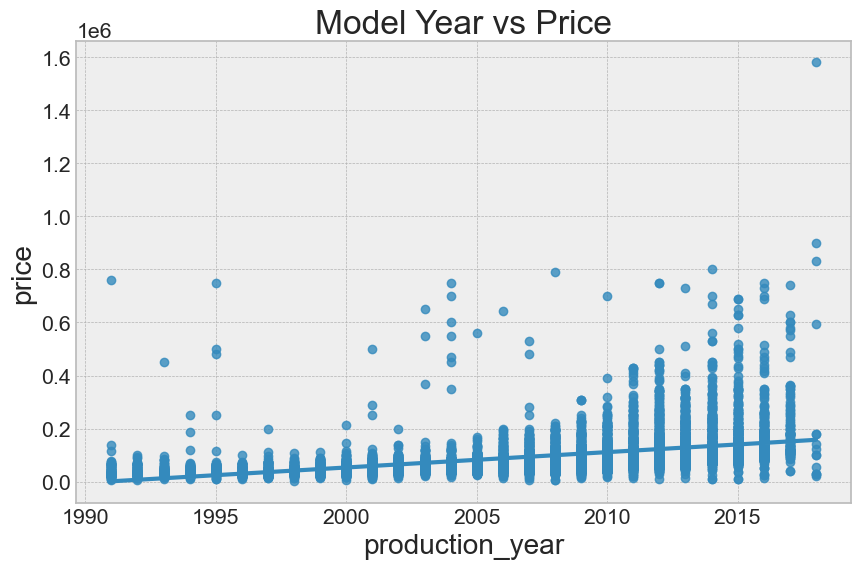

In [29]:
plt.style.use('bmh')
plt.figure(figsize=(10,6))
# plotting milage againt price 
sb.regplot(x='production_year', y='price', data=df).set_title('Model Year vs Price')

As we can see above the prices are more higher when the year of model is more recent . The recent  car models are the expensive ones. So it seems that the two variables are strongly correlated. Let's proceed and plot the regression plot from seaborn. 

#### Mileage vs Price

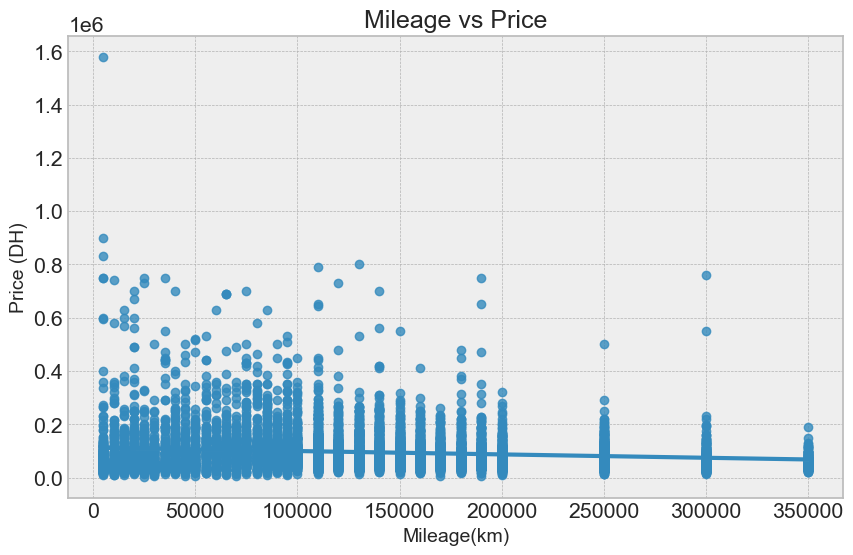

In [31]:
from matplotlib import pyplot as plt 
plt.style.use('bmh')
plt.figure(figsize=(10,6))
# plotting milage againt price as a regression plot 
sb.regplot(x='mileage', y='price', data=df).set_title('Milage vs Price')
plt.xlabel("Mileage(km)", fontsize=14)
plt.ylabel("Price (DH)", fontsize=14)
plt.title("Mileage vs Price",fontsize=18)
plt.show()

We notice above from the chart,  the prices of the car are  higher for short the milages. That's sounds pretty relevant. So,  we can say that the two variables have a negative correlation between them. If the one goes down, the other goes up.

#### Fiscal Power vs Price

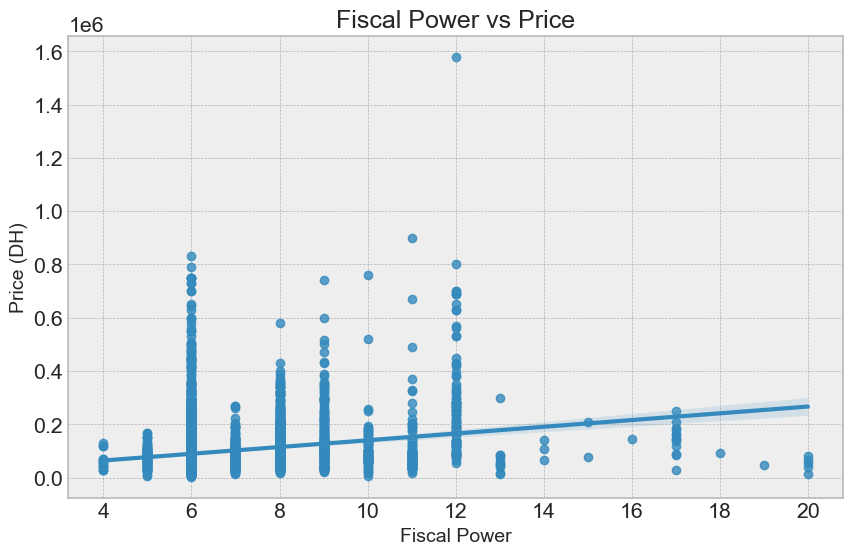

In [33]:
plt.figure(figsize=(10,6))
# plotting milage againt price 
sb.regplot(x='fiscal_power', y='price', data=df).set_title('Fiscal Power vs Price')
plt.xlabel("Fiscal Power", fontsize=14)
plt.ylabel("Price (DH)", fontsize=14)
plt.title("Fiscal Power vs Price",fontsize=18)
plt.show()

Car prices of the medium fiscal power are more concentrated on the left of the chart, meaning that these cars are the on demand  and sold in the market of used cars. As we notice above,  there is a light positive correlation between the fiscal power of a car and its price. Well , the correlation matrix will show us more about that. 

#### Top 20 Mark Dtribution

For the mark feature I have 54 marks, so plotting it all is not a good option for visual purpose, I will plot only the top 20 mark

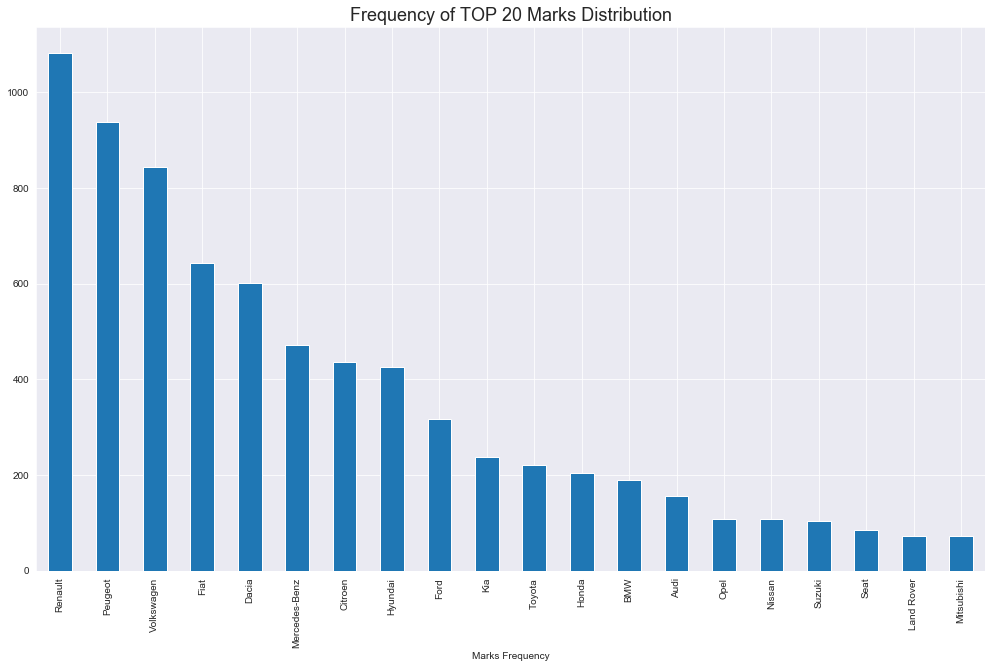

In [42]:
plt.figure(figsize=(17,10))
df.mark.value_counts(ascending=False).nlargest(20).plot(kind='bar')
plt.xlabel('Marks Frequency')
plt.title("Frequency of TOP 20 Marks Distribution",fontsize=18)
plt.show()

#### Fuel Type Distrubution

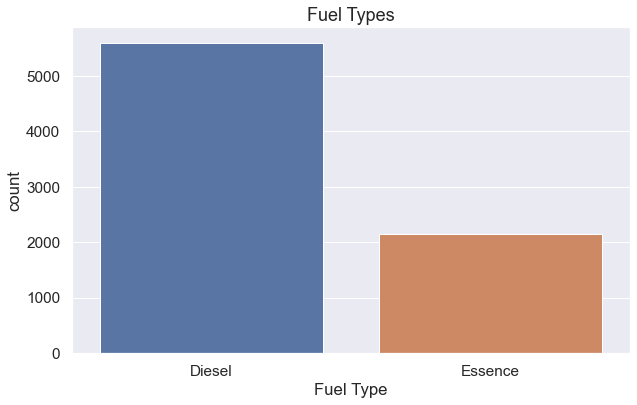

In [49]:
plt.figure(figsize=(10, 6))
sb.countplot(data = df, x='fuel_type')
plt.xlabel('Fuel Type')
plt.title("Fuel Types",fontsize=18)
plt.show()

From the chart above, there are only two main fuel type categories. The cars running with Diesel and the cars running with Essence. Thus, we can get rid of the other categories since we don't have any data about them.

In [163]:
df.fuel_type.value_counts()

Diesel        5609
Essence       2156
Electrique       3
LPG              2
Name: fuel_type, dtype: int64

In [97]:
#drop the othe LPG and Electrique from the fuel type categories 
df=df[(df.fuel_type=="Essence") | (df.fuel_type=="Diesel") ]
df.fuel_type.value_counts()

Diesel     5609
Essence    2156
Name: fuel_type, dtype: int64

#### Correlation Matrix

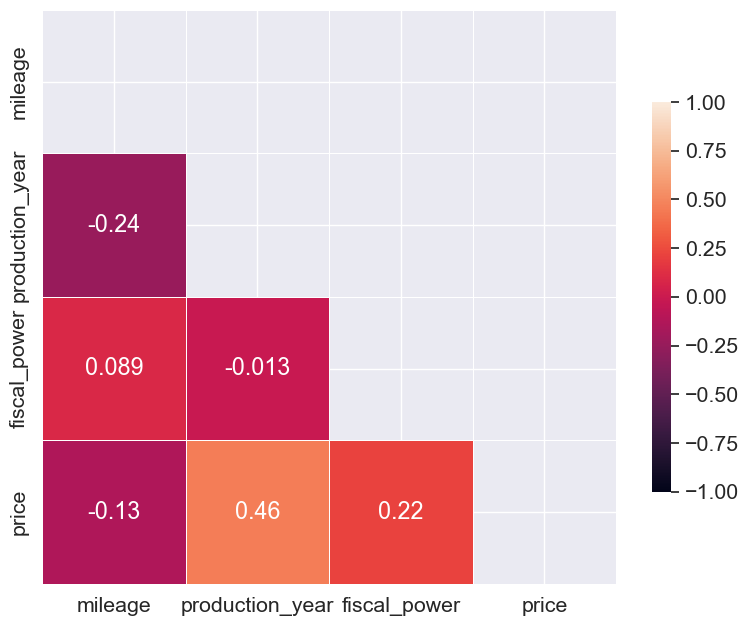

In [44]:
# To show correlations betwwen independent variable and dependant variable we plot the correlation heatmap
plt.style.use('ggplot')
sb.set(font_scale=1.4)
plt.figure(figsize = (8,7), tight_layout = True)
#plt.title('Collinearity Assumption', fontsize = 20)
corr_matrix = df[['mileage','production_year','fiscal_power','price']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool_))
cmap = sb.diverging_palette(10, 220, as_cmap=True)
corrplot = sb.heatmap(corr_matrix, 
            cmap = 'rocket', 
            mask = mask, 
            center = 0, 
            vmax = 1, 
            vmin = -1, 
            square = True, 
            linewidths = 0.5, 
            cbar_kws={"shrink": 0.6},
            annot = True)
plt.show()
fig = corrplot.get_figure()    
fig.savefig('collinearity.jpg',dpi = 600)

#### Used Cars Distrubutioon over Moroccan Cities 

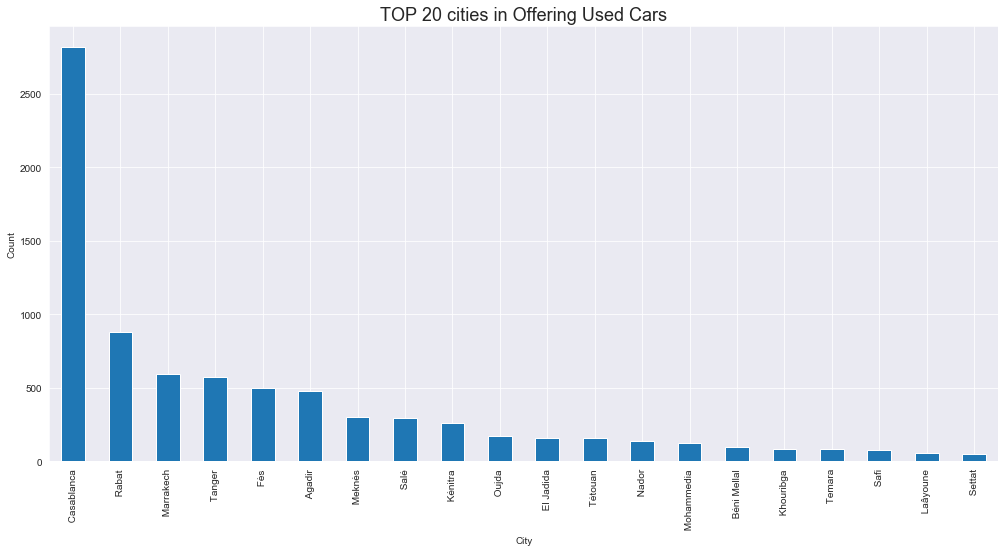

In [50]:
cars = pd.read_csv("./data/used_cars.csv", sep=",", header=None,names=colnames)
plt.figure(figsize=(17,8))
cars.city.value_counts(sort=True,ascending=False).nlargest(20).plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.title("TOP 20 cities in Offering Used Cars",fontsize=18)
plt.show()

### Checking Normality of Variables

In [47]:
num_stats = pd.DataFrame(df.describe().transpose())
num_stats

,count,mean,std,min,25%,50%,75%,max
price,7765.0,96251.834900,79292.982939,4000.0,51000.0,75000.0,115000.0,1580000.0
production_year,7765.0,2007.378622,6.309803,1991.0,2003.0,2009.0,2012.0,2018.0
mileage,7765.0,128698.935608,83606.906061,4999.0,64999.0,119999.0,179999.0,349999.0
fiscal_power,7765.0,6.523374,1.366270,4.0,6.0,6.0,6.0,20.0


In [49]:
cat_stats = pd.DataFrame(df.describe(include='object').transpose())
cat_stats

,count,unique,top,freq
fuel_type,7765,2,Diesel,5609
mark,7765,53,Renault,1082
model,7765,461,Logan,309


In [53]:
# Save stats 
num_stats.to_csv('../stats/num_stats.csv',index=False)
cat_stats.to_csv('../stats/cat_stats.csv',index=False)

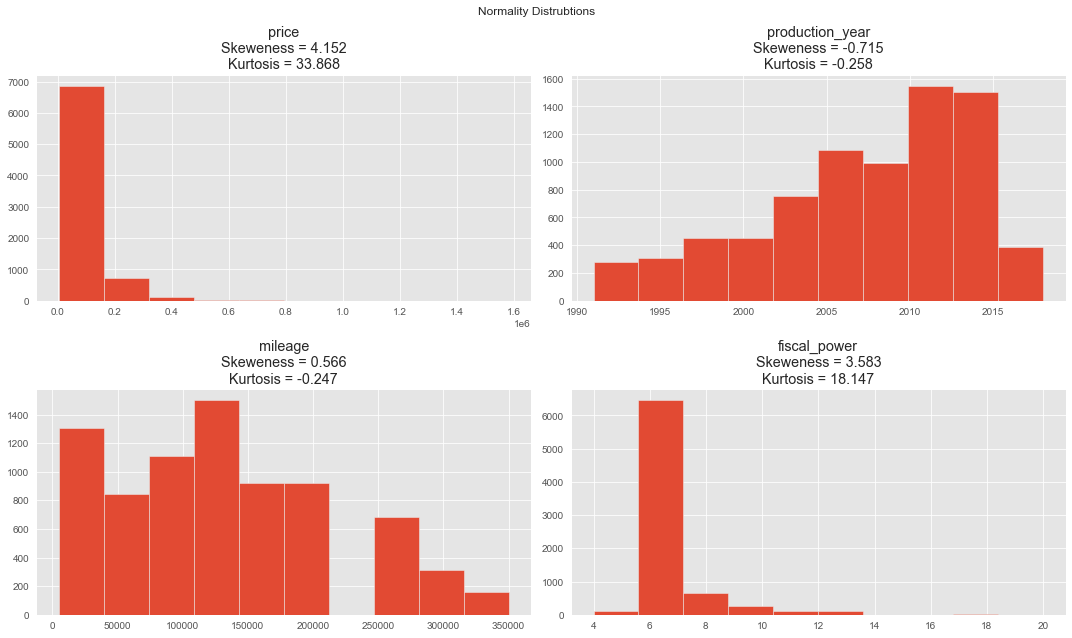

In [8]:
# Check variables skewness and kurtosis by plotting their histograms
# Filter numerical features only
plt.style.use('ggplot')
features = list(df.columns)
num_features = [feature for feature in features if df[feature].dtypes!='object']
fig, axes = plt.subplots(2, 2,figsize=(15,9))
axes = axes.ravel()
fig.suptitle('Normality Distrubtions')
for ax, feature in zip(axes,num_features):
    ax.hist(df[feature])
    #compute skewness
    skew_value = round(df[feature].skew(),3)
    kurt_value = round(df[feature].kurt(),3)
    ax.set_title(f"{feature}\nSkeweness = {skew_value}\nKurtosis = {kurt_value}")
plt.tight_layout()

In [80]:
#log transform the price [target variable]
#variables to transform 
df['log_price'] = np.log(df.price)
# print skewness of the price variable after log transformation 
print(df['log_price'].skew())

0.29198600335684993


Skewness of Price variable is being reduced.Now, let's proceed with machine learning modeling. 

In [56]:
# Save transformed data
df.to_csv("../data/transformed_data.csv")